# Machine Learning and AI for Autonomous Systems
## A program by IISc and TalentSprint
### Assignment: On-policy Prediction with Approximation

## Learning Objectives

At the end of the experiment, you will be able to:

* understand the need for value function approximation
* implement on-policy prediction with various linear function approximations
* implement on-policy prediction with neural network based function approximation

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2302794" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9008710123" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "AIAS_B2_M4_AST_08_On_policy_Prediction_with_Approximation_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aias-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Introduction

**Need for Value function approximation**

It is possible to encounter situations with very large problems or state spaces; even an infinite/continuous state space. Sometimes, the environment is as simple as gridworld and as well-defined as the state spaces of a game like chess, but that is not always the case. In the world of robotics, for example, a remote-controlled helicopter could encounter a potentially unlimited amount of situations/states, with no way of being able to catalog the actual value for every single one as he has never seen it before.

Also, we have been solving Markov Decision Processes (MDPs) by representing value functions quite specifically, making use of a lookup table. Every state s had an entry V(s), and every state-action pair
s,a had an entry Q(s, a). Effectively, we were able to take a look into this table and decide what to do next by
maximizing over all possible actions.

Two problems come to light using this strategy in the event of a large MDP,
- the first being that eventually we will
run out memory. There will, at some point, be too many states and/or actions to store.
- the second problem is
simply that even if there is enough memory, the process of estimationing each value separately would be too slow.

Value function approximation is the solution to this problem.


**Value function approximation**

Value function approximation tries to build some function to estimate the true value function by creating a compact
representation of the value function that uses a smaller amount of parameters:

$\hat{\text{v}}(s,\textbf{w}) \approx \text{v}_\pi(s)$, or

$\hat{q}(s,a,\textbf{w}) \approx q_\pi(s,a)$
<br><br>

There are many function approximators such as:
- **Linear methods**
- **Neural networks**
- **Decision Tree**
- **Nearest neighbor**

For example, in the case of deep learning, the weights of the neural network are the vector of weights $\text{w}$ that will be used to estimate the value function across the entire state or state-action space. This vector of weights will be updated using either the Monte Carlo or Temporal-Difference learning methods.

Since we will use gradient descent in order to find the best result, the function approximators must be
differentiable, which leads us to *Linear combinations of features* and *Neural Networks*.

## Linear methods (Linear combinations of features)

Let's look at how we make use of *Stochastic Gradient Descent* in value function approximation to adjust
the weight vector after each example. The goal is to find a parameter vector $\text{w}$ minimizing the mean-squared error between the approximate value function and the true value function.

Gradient descent does this by finding a local minimum:

$\textbf{w}_{t+1} ≐ \textbf{w}_t - \frac{1}{2} α\ ∇\big[\text{v}_π(S_t) - \hat{\text{v}}(S_t,\textbf{w}_t)\big]^2$

$\quad \quad \ = \textbf{w}_t + α \big[\text{v}_π(S_t) - \hat{\text{v}}(S_t,\textbf{w}_t)\big] ∇\hat{\text{v}}(S_t, \textbf{w}_t)$
<br><br>
Each feature is something that tells us anything about the state space. It allows us to strictly define exactly what we use to represent the the environment/our interaction with it. By compiling together a linear combination of features, we represent the value function with a weighted sum. Mathematically speaking, the dot-product of the *feature vector* and the *weight vector* will be the estimation of the value function, i.e.,

$$\hat{\text{v}}(S,\textbf{w}) = x(S)^T \textbf{w} = \sum_{j=1}^n x_j(S)\textbf{w}_j$$
<br><br>
Our objective function, the mean-squared error function that we are looking to optimize, becomes quadratic in
parameters $\text{w}$.

$$\text{J}(\text{w}) = 𝔼_π \big[ (\text{v}_π(S) - x(S)^T\textbf{w})^2 \big]$$

Stochastic gradient descent converges on the global optimum using the following update rule:

$$δ_\text{w}\hat{\text{v}}(S, \textbf{w}) = x(S)$$

$$\quad \quad \text{w}_{t+1} = \text{w}_t + α \big[\text{v}_π(S) - \hat{\text{v}}(S, \text{w})\big]\ x(S)$$
<br><br>

The change to the weights comes from making a small step, depending on the step-size parameter, $α$, to adjust the
relevant features to the particular situation.

Now, to make this relevant to reinforcement learning, we'll have to make use of our learning methods.

Since, the true value function is not initially known, we make use of the learning methods to substitute in a target.

- In Monte Carlo learning, the
target is the return $Gₙ$
$$\textbf{w}_{t+1} = \textbf{w}_t + α \big[G_t - \hat{\text{v}}(S_t,\textbf{w}_t)\big] ∇_\text{w}\hat{\text{v}}(S_t, \textbf{w}_t)$$

- In TD(0), the target is the TD target, and the update looks like:
$$\textbf{w}_{t+1} = \textbf{w}_t + α \big[R_{t+1} + γ\hat{\text{v}}(S_{t+1}, \textbf{w}_t) - \hat{\text{v}}(S_t,\textbf{w}_t)\big] ∇_\text{w}\hat{\text{v}}(S_t, \textbf{w}_t)$$
<br><br>

Similarly, the above state-value function approximation can approximate the action-value function with
stochastic gradient descent.

$$\textbf{w}_{t+1} = \textbf{w}_t + α \big[q_π(S,A) - \hat{q}(S,A,\textbf{w}_t)\big] ∇_\text{w}\hat{q}(S,A, \textbf{w}_t)$$

For example, the update for the one-step Sarsa method is

$$\textbf{w}_{t+1} ≐ \textbf{w}_t + α \big[R_{t+1} + γ\hat{q}(S_{t+1},A_{t+1}, \textbf{w}_t) - \hat{q}(S_t,A_t,\textbf{w}_t)\big] ∇_\text{w}\hat{q}(S_t,A_t, \textbf{w}_t)$$

Some of the Linear combinations of features include:

- **Polynomials**
- **Fourier Basis**
- **Coarse Coding**
- **Tile Coding**
- **Radial Basis Functions**

## Building AI solution with Function Approximation

Let's see the implementation of the semi-gradient Sarsa method with above discussed function approximations using *Mountain Car* example.

### Import required packages

In [ ]:
!pip -q install swig
!pip -q install gymnasium
!pip -q install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import gymnasium as gym
import random
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib as mpl
mpl.rc('animation', html='jshtml')
from IPython.display import clear_output

import sklearn.preprocessing
from sklearn.kernel_approximation import RBFSampler
import sklearn.pipeline

import warnings
warnings.filterwarnings('ignore')

## Example: Mountain Car

Here, the task is to strategically accelerate the car to reach on top of the right hill without hitting the left side wall.

<br>
<center>
<img src="https://cdn.iisc.talentsprint.com/AIAS/mountain_car.gif" width=500px>
</center>
<br>

The Mountain Car MDP is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill. There are two versions of the mountain car domain in gymnasium: one with discrete actions and one with continuous. Here, the environment with discrete actions is considered.

<br>

Let's see the details of different aspects, such as rewards, states, and actions, that needs to be considered while modeling an RL solution for this problem.


### **Actions**

There are 3 discrete deterministic actions:

- 0: Accelerate to the left
- 1: Don't accelerate
- 2: Accelerate to the right

### **States** (Observations)

The observation is a ndarray with shape (2,) where the elements correspond to the following:
<br><br>

|  Num  |  Observation  |  Min  |  Max  |  Unit  |
|:--------------|:-----------|:-----------|:-----------|:-----------|
| 0 | position of the car along the x-axis | -1.2 | 0.6 | position (m) |
| 1 | velocity of the car | -0.07 | 0.07 | velocity (v) |

<br>

### **Rewards**

The goal is to reach the flag placed on top of the right hill as quickly as possible, as such the agent is penalised with a reward of -1 for each timestep.

### **Starting State**

The position of the car is assigned a uniform random value in [-0.6 , -0.4]. The starting velocity of the car is always assigned to 0.

### **Episode End**

The episode ends if either of the following happens:

- Termination: The position of the car is greater than or equal to 0.5 (the goal position on top of the right hill)
- Truncation: The length of the episode is 200.

To know more about the MountainCar environment, refer [here](https://gymnasium.farama.org/environments/classic_control/mountain_car/).

### Create Environment

An environment can be created using `gym.make()` function. After the environment is created, it must be initialized using the `reset()` method. This returns the first observation/state. Observations depend on the type of environment.

In [ ]:
# Create MountainCar environment
env = gym.make("MountainCar-v0", render_mode="rgb_array")

# Initial state
state_, info = env.reset()
state_

array([-0.59741426,  0.        ], dtype=float32)

In case of Mountain Car environment, the state is a 2-dimensional vector.

### Visualize Environment

Let's create a function to visualize the environment.

In [ ]:
# Create a function to plot environment

def plot_environment(env):
    img = env.render()              # render() will render the frame/snapshot of environment in current state.
                                     # We want render() to return the rendered image as a NumPy array, that's why
                                     # we set render_mode="rgb_array" while instantiating the environment
                                    # Also, once the render() is called, then the environment either must be reset() or a step() has to be taken before calling the render() again
    plt.imshow(img)
    #plt.axis("off")
    return img


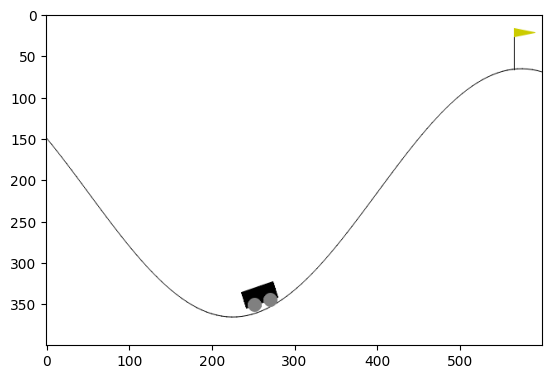

In [ ]:
# Visualize environment
env.reset()
plot_environment(env)
plt.show()

In [ ]:
# Action and State spaces
print("Action Space:\n {}".format(env.action_space))
print("State Space:\n {}".format(env.observation_space))

Action Space:
 Discrete(3)
State Space:
 Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


- ***Discrete:*** describes a discrete space where {0, 1, …, n-1} are the possible values our action can take.

- ***Box:*** describes an n-dimensional continuous space. It's a bounded space where we can define the upper and lower limits which describe the valid values our actions/observations can take.

## 1. Simple Linear Model

Considering State vector and Action as features. The feature vector will be of size 4.

features = `[bias, position_of_car, velocity_of_car, action]`

In [ ]:
# Feature Scaling

# Normalize to zero mean and unit variance:
# We use a few samples from the observation space to do this
observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(observation_examples)

StandardScaler()

In [ ]:
# Initialize Weights randomly

weights_1 = np.random.uniform(-0.001, 0, size=4)   # Parameters for FuncApprox. = 4 parameters
len(weights_1)

4

In [ ]:
# Create a function to represent your Value Function

def value_function_1(state, action, weights):
    scaled = scaler.transform([state])
    X = np.concatenate([np.array([[1]]), scaled, np.array([action]).reshape(-1,1)], axis=1)
    return np.sum(X * weights)


# Create a function to calculate the derivative of the Value Function

def value_function_derivative_1(state, action):
    scaled = scaler.transform([state])
    X = np.concatenate([np.array([[1]]), scaled, np.array([action]).reshape(-1,1)], axis=1)
    return X

In [ ]:
sample_action = env.action_space.sample()
value_function_1(state_, sample_action, weights_1)

-0.0005952476927614207

In [ ]:
value_function_derivative_1(state_, sample_action)

array([[ 1.        , -0.57929405, -0.00619866,  0.        ]])

Let's now create the training algorithm, TD(0), that will update the weights using Gradient Descent as the agent explores the environment over thousands of episodes.

In [ ]:
# Simple Linear model based Function Approximation

# Hyperparameters
alpha = 0.05        # Learning rate
gamma = 0.9         # Discount factor
epsilon = 1.0       # epsilon to be used by greedy policy
episodes = 2000
max_steps_per_episode = 300


# For plotting metrics
all_epochs_1 = []
all_rewards_1 = []


# Function approximation using TD(0)

for i in range(1, episodes + 1):
    # Initial state and reward
    state, info = env.reset()
    reward = 0
    done = False

    # Using epsilon-greedy policy for selecting the initial action to take
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()   # Explore action space
    else:
        action = np.argmax([value_function_1(state, a, weights_1) for a in range(env.action_space.n)])     # Exploit learned values

    epochs, rewards = 0, 0
    count = 0

    while not done:

        # Take action on environment, and get reward and next-state
        next_state, reward, done, truncated, info = env.step(action)

        # Using epsilon-greedy policy for selecting the action to take
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()   # Explore action space
        else:
            next_action = np.argmax([value_function_1(next_state, a, weights_1) for a in range(env.action_space.n)])     # Exploit learned values

        # Update weights
        Vs = value_function_1(state, action, weights_1)
        Vs_ = value_function_1(next_state, next_action, weights_1)
        delV = value_function_derivative_1(state, action)

        weights_1 = weights_1 + alpha*(reward + gamma*Vs_ - Vs) * delV

        if done:
            break

        action = next_action
        state = next_state

        epochs += 1
        rewards += reward

        count += 1

        if count > max_steps_per_episode:
            break

    if epsilon > 0.09:
        epsilon = epsilon - 2/episodes
    else:
        epsilon = 0.09

    all_epochs_1.append(epochs)
    all_rewards_1.append(rewards)

    if i % 100 == 0:
        #clear_output(wait=True)
        print(f"Episode: {i}/{episodes}, Epsilon: {np.round(epsilon,2)}, Reward: {np.round(rewards,2)}, Avg_score: {np.mean(all_rewards_1[-100:]).round(2)}")

print("Training finished.\n")

Episode: 100/2000, Epsilon: 0.9, Reward: -301.0, Avg_score: -301.0
Episode: 200/2000, Epsilon: 0.8, Reward: -301.0, Avg_score: -301.0
Episode: 300/2000, Epsilon: 0.7, Reward: -301.0, Avg_score: -301.0
Episode: 400/2000, Epsilon: 0.6, Reward: -301.0, Avg_score: -301.0
Episode: 500/2000, Epsilon: 0.5, Reward: -301.0, Avg_score: -300.8
Episode: 600/2000, Epsilon: 0.4, Reward: -301.0, Avg_score: -301.0
Episode: 700/2000, Epsilon: 0.3, Reward: -301.0, Avg_score: -301.0
Episode: 800/2000, Epsilon: 0.2, Reward: -301.0, Avg_score: -301.0
Episode: 900/2000, Epsilon: 0.1, Reward: -301.0, Avg_score: -301.0
Episode: 1000/2000, Epsilon: 0.09, Reward: -301.0, Avg_score: -301.0
Episode: 1100/2000, Epsilon: 0.09, Reward: -301.0, Avg_score: -301.0
Episode: 1200/2000, Epsilon: 0.09, Reward: -301.0, Avg_score: -301.0
Episode: 1300/2000, Epsilon: 0.09, Reward: -301.0, Avg_score: -301.0
Episode: 1400/2000, Epsilon: 0.09, Reward: -301.0, Avg_score: -301.0
Episode: 1500/2000, Epsilon: 0.09, Reward: -301.0, A

#### Plot metrics

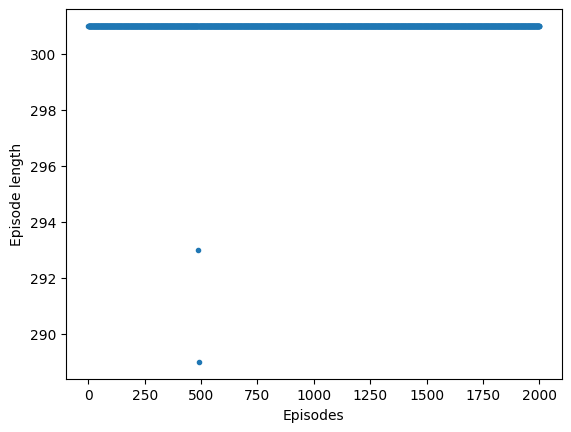

In [ ]:
plt.plot(all_epochs_1, '.')
plt.ylabel("Episode length")
plt.xlabel("Episodes")
plt.show()

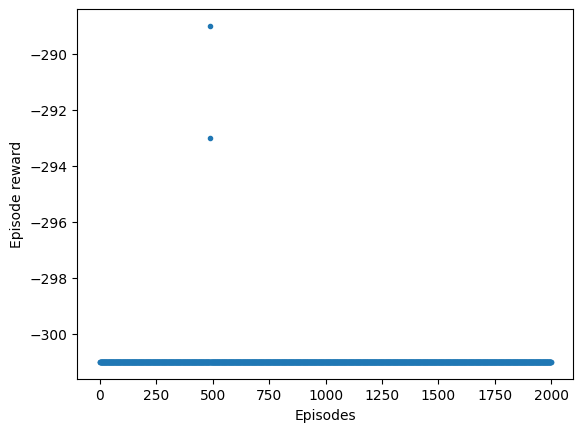

In [ ]:
plt.plot(all_rewards_1, '.')
plt.ylabel("Episode reward")
plt.xlabel("Episodes")
plt.show()

From the above plot, it can be seen that there is a little improvement during training.


### Visualize performance

To evaluate agent's performance, let's create a function that will return the frames/snapshots of the enviorment as the agent progresses. Also, create functions that will use these frames to create an overall animation.

In [ ]:
# Create function to return frames for animation

def render_frames(value_function, weights, max_steps = 500):
    frames = []
    env = gym.make("MountainCar-v0", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    count = 0

    while not done:
        img = env.render()
        frames.append(img)
        action = np.argmax([value_function(state, a, weights) for a in range(env.action_space.n)])
        state, reward, done, truncated, info = env.step(action)
        count += 1
        if count > max_steps:
            break

    env.close()
    return frames

In [ ]:
# Create functions to plot animation

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(fig, update_scene, fargs=(frames, patch),
                                   frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [ ]:
# Visualize animation
frames = render_frames(value_function_1, weights_1)
plot_animation(frames)

Output hidden; open in https://colab.research.google.com to view.

Play the above animation to see the agent's progress.

From the above animation, we can see that the agent is having trouble while reaching the goal. It has not learned anything during the training. One reason could be that, we have only considered the state vector dimensions as features and did not take into account any interactions between these dimensions.

Let's try adding more complex features to the Linear Value function.

## 2. Polynomials

Considering the combination of State vector and Action as features. The feature vector will be of size 10.

state = (position_of_car, velocity_of_car) or $[p,\ v]$

features = $[\text{bias},\ p,\ v,\ pv,\ p^2,\ v^2,\ p^2v,\ pv^2,\ p^2v^2,\ \text{action}]$


In [21]:
# Feature Scaling
# Normalize to zero mean and unit variance

scaler_poly = sklearn.preprocessing.StandardScaler()

In [22]:
# We use a few samples from the observation space to do Feature Scaling

obs_examples = np.array([env.observation_space.sample() for x in range(10000)])
polynomial_features = []

for obs in obs_examples:
    polynomial_features.append(np.array([1, obs[0], obs[1], obs[0]*obs[1], obs[0]**2, obs[1]**2, obs[0]**2 * obs[1], obs[0] * obs[1]**2, obs[0]**2 * obs[1]**2]))

polynomial_examples = np.array(polynomial_features)

In [23]:
# Fit Scaler on few samples

scaler_poly.fit(polynomial_examples)

StandardScaler()

In [24]:
# Initialize Weights randomly

weights_poly = np.random.uniform(-0.001, 0, size=10)   # Parameters for FuncApprox. = 10 parameters
weights_poly.shape

(10,)

In [25]:
# Create a function to represent your Value Function

def value_function_poly(obs, action, weights):
    poly_feature = np.array([1, obs[0], obs[1], obs[0]*obs[1], obs[0]**2, obs[1]**2, obs[0]**2 * obs[1], obs[0] * obs[1]**2, obs[0]**2 * obs[1]**2])
    scaled = scaler_poly.transform([poly_feature])
    X = np.concatenate([scaled, np.array([action]).reshape(-1,1)], axis=1)
    return np.sum(X * weights)


# Create a function to calculate the derivative of the Value Function

def value_function_derivative_poly(state, action):
    poly_feature = np.array([1, obs[0], obs[1], obs[0]*obs[1], obs[0]**2, obs[1]**2, obs[0]**2 * obs[1], obs[0] * obs[1]**2, obs[0]**2 * obs[1]**2])
    scaled = scaler_poly.transform([poly_feature])
    X = np.concatenate([scaled, np.array([action]).reshape(-1,1)], axis=1)
    return X

In [26]:
sample_action = env.action_space.sample()
value_function_poly(state_, sample_action, weights_poly)

0.0009169905507069664

In [27]:
value_function_derivative_poly(state_, sample_action).shape

(1, 10)

Let's now create the training algorithm, TD(0), that will update the weights using Gradient Descent as the agent explores the environment over thousands of episodes.

In [28]:
# Polynomials based Function Approximation

# Hyperparameters
alpha = 0.05        # Learning rate
gamma = 0.99        # Discount factor
epsilon = 1.0       # epsilon to be used by greedy policy
episodes = 2000
max_steps_per_episode = 300


# For plotting metrics
all_epochs_poly = []
all_rewards_poly = []


# Function approximation using TD(0)

for i in range(1, episodes + 1):
    # Initial state and reward
    state, info = env.reset()
    reward = 0
    done = False

    # Using epsilon-greedy policy for selecting the initial action to take
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()   # Explore action space
    else:
        action = np.argmax([value_function_poly(state, a, weights_poly) for a in range(env.action_space.n)])     # Exploit learned values

    epochs, rewards = 0, 0
    count = 0

    while not done:

        # Take action on environment, and get reward and next-state
        next_state, reward, done, truncated, info = env.step(action)

        # Using epsilon-greedy policy for selecting the action to take
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()   # Explore action space
        else:
            next_action = np.argmax([value_function_poly(next_state, a, weights_poly) for a in range(env.action_space.n)])     # Exploit learned values

        # Update weights
        Vs = value_function_poly(state, action, weights_poly)
        Vs_ = value_function_poly(next_state, next_action, weights_poly)
        delV = value_function_derivative_poly(state, action)

        weights_poly = weights_poly + alpha*(reward + gamma*Vs_ - Vs) * delV

        if done:
            break

        action = next_action
        state = next_state

        epochs += 1
        rewards += reward

        count += 1

        if count > max_steps_per_episode:
            break

    if epsilon > 0.08:
        epsilon = epsilon - 1/episodes
    else:
        epsilon = 0.08

    all_epochs_poly.append(epochs)
    all_rewards_poly.append(rewards)

    if i % 100 == 0:
        #clear_output(wait=True)
        print(f"Episode: {i}/{episodes}, Epsilon: {np.round(epsilon,2)}, Reward: {np.round(rewards,2)}, Avg_score: {np.mean(all_rewards_poly[-100:]).round(2)}")

print("Training finished.\n")

Episode: 100/2000, Epsilon: 0.95, Reward: -301.0, Avg_score: -301.0
Episode: 200/2000, Epsilon: 0.9, Reward: -301.0, Avg_score: -301.0
Episode: 300/2000, Epsilon: 0.85, Reward: -301.0, Avg_score: -301.0
Episode: 400/2000, Epsilon: 0.8, Reward: -301.0, Avg_score: -301.0
Episode: 500/2000, Epsilon: 0.75, Reward: -301.0, Avg_score: -301.0
Episode: 600/2000, Epsilon: 0.7, Reward: -301.0, Avg_score: -301.0
Episode: 700/2000, Epsilon: 0.65, Reward: -301.0, Avg_score: -301.0
Episode: 800/2000, Epsilon: 0.6, Reward: -301.0, Avg_score: -301.0
Episode: 900/2000, Epsilon: 0.55, Reward: -301.0, Avg_score: -301.0
Episode: 1000/2000, Epsilon: 0.5, Reward: -301.0, Avg_score: -301.0
Episode: 1100/2000, Epsilon: 0.45, Reward: -301.0, Avg_score: -301.0
Episode: 1200/2000, Epsilon: 0.4, Reward: -301.0, Avg_score: -301.0
Episode: 1300/2000, Epsilon: 0.35, Reward: -301.0, Avg_score: -301.0
Episode: 1400/2000, Epsilon: 0.3, Reward: -301.0, Avg_score: -301.0
Episode: 1500/2000, Epsilon: 0.25, Reward: -301.0,

#### Plot metrics

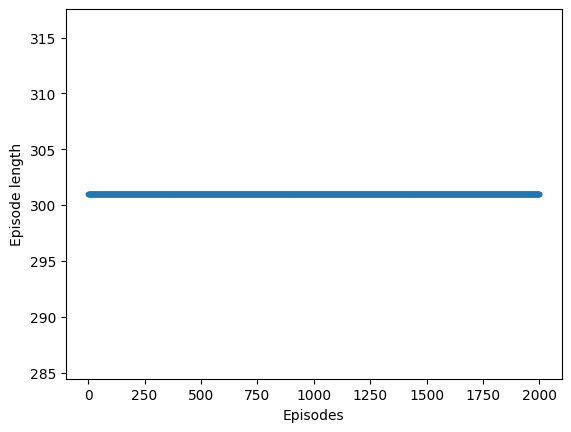

In [29]:
plt.plot(all_epochs_poly, '.')
plt.ylabel("Episode length")
plt.xlabel("Episodes")
plt.show()

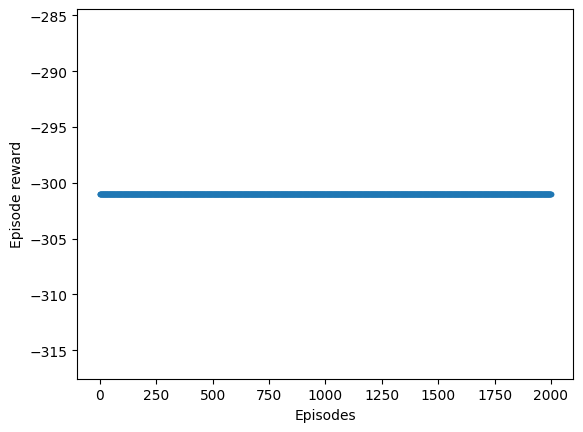

In [30]:
plt.plot(all_rewards_poly, '.')
plt.ylabel("Episode reward")
plt.xlabel("Episodes")
plt.show()

### Visualize performance

In [ ]:
# Visualize animation
frames = render_frames(value_function_poly, weights_poly)
plot_animation(frames)

## 3. Tile Coding

For this problem we will define Tile Coding. The following Class define a TileCoding. Each variable will be discretized using *`numTilings`* grids, each one with *`tilesPerTiling x tilesPerTiling`* dimension. Tiles are overlaping in the usual way:
<br><br>

<img src="https://cdn.iisc.talentsprint.com/AIAS/TileCoding.png" width=800>


In [ ]:
class Tilecoder:

    def __init__(self, numTilings, tilesPerTiling):
        # Set max value for normalization of inputs
        self.maxNormal = 1
        self.maxVal = env.observation_space.high
        self.minVal = env.observation_space.low
        self.numTilings = numTilings
        self.tilesPerTiling = tilesPerTiling
        self.dim = len(self.maxVal)
        self.numTiles = (self.tilesPerTiling**self.dim) * self.numTilings
        self.actions = env.action_space.n
        self.n = self.numTiles * self.actions
        self.tileSize = np.divide(np.ones(self.dim)*self.maxNormal, self.tilesPerTiling-1)

    def getFeatures(self, variables):
        # Ensures range is always between 0 and self.maxValue
        values = np.zeros(self.dim)
        for i in range(len(env.observation_space.shape)+1):
            values[i] = self.maxNormal * ((variables[i] - self.minVal[i])/(self.maxVal[i]-self.minVal[i]))
        tileIndices = np.zeros(self.numTilings)
        matrix = np.zeros([self.numTilings,self.dim])
        for i in range(self.numTilings):
            for i2 in range(self.dim):
                matrix[i,i2] = int(values[i2] / self.tileSize[i2] + i / self.numTilings)
        for i in range(1,self.dim):
            matrix[:,i] *= self.tilesPerTiling**i
        for i in range(self.numTilings):
            tileIndices[i] = (i * (self.tilesPerTiling**self.dim) + sum(matrix[i,:]))
        return tileIndices

    def oneHotVector(self, features, action):
        oneHot = np.zeros(self.n)
        for i in features:
            index = int(i + (self.numTiles*action))
            oneHot[index] = 1
        return oneHot

    def getVal(self, theta, features, action):
        val = 0
        for i in features:
            index = int(i + (self.numTiles*action))
            val += theta[index]
        return val

    def getQ(self, features, theta):
        Q = np.zeros(self.actions)
        for i in range(self.actions):
            Q[i] = tile.getVal(theta, features, i)
        return Q


In [ ]:
# Tile Coding based Function Approximation

tile = Tilecoder(7, 14)            # Definition of tiles (7x (14x14))
weights_tile = np.random.uniform(-0.001, 0, size=(tile.n))   # Parameters for FuncApprox. (7x (14x14)) = 1372 parameters


# Hyperparameters
alpha = 0.05        # Learning rate
gamma = 0.99        # Discount factor
epsilon = 1.0       # epsilon to be used by greedy policy
episodes = 2000
max_steps_per_episode = 300


# For plotting metrics
all_epochs_tile = []
all_rewards_tile = []


# Function approximation using TD(0)

for i in range(1, episodes + 1):
    # Initial state and reward
    state, info = env.reset()
    features = tile.getFeatures(state)  # Vector of 1372 representing state
    Q = tile.getQ(features, weights_tile)      # Q-values for given state all actions

    reward = 0
    done = False

    # Using epsilon-greedy policy for selecting the initial action to take
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()   # Explore action space
    else:
        action = np.argmax(Q)     # Exploit learned values

    epochs, rewards = 0, 0
    count = 0

    while not done:

        # Take action on environment, and get reward and next-state
        next_state, reward, done, truncated, info = env.step(action)

        next_features = tile.getFeatures(next_state)  # Vector of 1372 representing state
        Q_ = tile.getQ(next_features, weights_tile)      # Q-values for given state all actions

        # Using epsilon-greedy policy for selecting the action to take
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()   # Explore action space
        else:
            next_action = np.argmax(Q_)     # Exploit learned values

        # Update weigths
        Vs = np.max(Q)
        Vs_ = Q_[next_action]
        delV = tile.oneHotVector(features, action)

        weights_tile = weights_tile + alpha*(reward + gamma*Vs_ - Vs) * delV

        if done:
            break

        action = next_action
        state = next_state
        features = next_features
        Q = Q_

        epochs += 1
        rewards += reward

        count += 1

        if count > max_steps_per_episode:
            break

    if epsilon > 0.06:
        epsilon = epsilon - 2/episodes
    else:
        epsilon = 0.06

    all_epochs_tile.append(epochs)
    all_rewards_tile.append(rewards)

    if i % 100 == 0:
        #clear_output(wait=True)
        print(f"Episode: {i}/{episodes}, Epsilon: {np.round(epsilon,2)}, Reward: {np.round(rewards,2)}, Avg_score: {np.mean(all_rewards_tile[-100:]).round(2)}")

print("Training finished.\n")

#### Plot metrics

In [ ]:
plt.plot(all_epochs_tile, '.')
plt.ylabel("Episode length")
plt.xlabel("Episodes")
plt.show()

In [ ]:
plt.plot(all_rewards_tile, '.')
plt.ylabel("Episode reward")
plt.xlabel("Episodes")
plt.show()

From the above plot, it can be seen that at starting episodes rewards are low, but as the training progresses the rewards start increasing.

### Visualize performance

In [ ]:
# Create function to return frames for animation

def render_frames_for_tile_coding(tile, weights):
    frames = []
    env = gym.make("MountainCar-v0", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    count = 0

    while not done:
        img = env.render()
        frames.append(img)
        features = tile.getFeatures(state)
        Q = tile.getQ(features, weights)
        action = np.argmax(Q)
        state, reward, done, truncated, info = env.step(action)
        count += 1
        if count > 500:
            break

    env.close()
    return frames

In [ ]:
# Visualize animation
frames = render_frames_for_tile_coding(tile, weights_tile)
plot_animation(frames)

Play the above animation to see the agent's progress.

## 4. Radial Basis Functions

Radial basis functions (RBFs) are the natural generalization of coarse coding to continuousvalued features. Rather than each feature being either 0 or 1, it can be anything in the interval [0, 1], reflecting various degrees to which the feature is present.

A typical RBF feature, $x_i$, has a Gaussian (bell-shaped) response $x_i(s)$ dependent only on the distance between the state, $s$, and the feature's prototypical or center state, $c_i$, and relative to the
feature's width, $σ_i$:

$$x_i(s)\ ≐\ exp \big(-\frac{||s-c_i||^2}{2\sigma^2_i}  \big)$$

The norm or distance metric can be chosen in whatever way seems most appropriate to the states and task at hand.

Here, we use RBFSampler from Scikit-learn library to create RBF based features.

In [ ]:
# Feature Preprocessing

# Normalize to zero mean and unit variance:
# We use a few samples from the observation space to do this
observation_examples = np.array([env.observation_space.sample() for x in range(10000)])
scaler_rbf = sklearn.preprocessing.StandardScaler()
scaler_rbf.fit(observation_examples)

# Convert a state to a featurized represenation:
# We use RBF kernels with different variances to cover different parts of the space

featurizer = sklearn.pipeline.FeatureUnion([
        ("rbf1", RBFSampler(gamma=5.0, n_components=100)),
        ("rbf2", RBFSampler(gamma=2.0, n_components=100)),
        ("rbf3", RBFSampler(gamma=1.0, n_components=100)),
        ("rbf4", RBFSampler(gamma=0.5, n_components=100))
        ])

action_examples = np.array([env.action_space.sample() for x in range(10000)])
obs_action_examples = np.concatenate([scaler_rbf.transform(observation_examples), action_examples.reshape(10000,1)], axis=1)

featurizer.fit(obs_action_examples)

In [ ]:
# Initialize Weights randomly

weights_rbf = np.random.uniform(-0.001, 0, size=400)   # Parameters for FuncApprox. = 400 parameters
weights_rbf.shape

In [ ]:
# Create a function to represent your Value Function

def value_function_rbf(state, action, weights):
    scaled = scaler_rbf.transform([state])
    sa = np.concatenate([scaled, np.array([action]).reshape(-1,1)], axis=1)
    X = featurizer.transform(sa)
    return np.sum(X * weights)


# Create a function to calculate the derivative of the Value Function

def value_function_derivative_rbf(state, action):
    scaled = scaler_rbf.transform([state])
    sa = np.concatenate([scaled, np.array([action]).reshape(-1,1)], axis=1)
    X = featurizer.transform(sa)
    return X

In [ ]:
sample_action = env.action_space.sample()
value_function_rbf(state_, sample_action, weights_rbf)

In [ ]:
value_function_derivative_rbf(state_, sample_action).shape

Let's now create the training algorithm, TD(0), that will update the weights using Gradient Descent as the agent explores the environment over thousands of episodes.

In [ ]:
# Radial Basis Functions based Function Approximation

# Hyperparameters
alpha = 0.05        # Learning rate
gamma = 0.99        # Discount factor
epsilon = 1.0       # epsilon to be used by greedy policy
episodes = 1000
max_steps_per_episode = 300


# For plotting metrics
all_epochs_rbf = []
all_rewards_rbf = []


# Function approximation using TD(0)

for i in range(1, episodes + 1):
    # Initial state and reward
    state, info = env.reset()
    reward = 0
    done = False

    # Using epsilon-greedy policy for selecting the initial action to take
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()   # Explore action space
    else:
        action = np.argmax([value_function_rbf(state, a, weights_rbf) for a in range(env.action_space.n)])     # Exploit learned values

    epochs, rewards = 0, 0
    count = 0

    while not done:

        # Take action on environment, and get reward and next-state
        next_state, reward, done, truncated, info = env.step(action)

        # Using epsilon-greedy policy for selecting the action to take
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()   # Explore action space
        else:
            next_action = np.argmax([value_function_rbf(next_state, a, weights_rbf) for a in range(env.action_space.n)])     # Exploit learned values

        # Update weights
        Vs = value_function_rbf(state, action, weights_rbf)
        Vs_ = value_function_rbf(next_state, next_action, weights_rbf)
        delV = value_function_derivative_rbf(state, action)

        weights_rbf = weights_rbf + alpha*(reward + gamma*Vs_ - Vs) * delV

        if done:
            break

        action = next_action
        state = next_state

        epochs += 1
        rewards += reward

        count += 1

        if count > max_steps_per_episode:
            break

    if epsilon > 0.05:
        epsilon = epsilon - 2/episodes
    else:
        epsilon = 0.05

    all_epochs_rbf.append(epochs)
    all_rewards_rbf.append(rewards)

    if i % 100 == 0:
        #clear_output(wait=True)
        print(f"Episode: {i}/{episodes}, Epsilon: {np.round(epsilon,2)}, Reward: {np.round(rewards,2)}, Avg_score: {np.mean(all_rewards_rbf[-100:]).round(2)}")

print("Training finished.\n")

#### Plot metrics

In [ ]:
plt.plot(all_epochs_rbf, '.')
plt.ylabel("Episode length")
plt.xlabel("Episodes")
plt.show()

In [ ]:
plt.plot(all_rewards_rbf, '.')
plt.ylabel("Episode reward")
plt.xlabel("Episodes")
plt.show()

From the above plot, it can be seen that at starting episodes rewards are low, but as the training progresses the rewards start increasing.

### Visualize performance

In [ ]:
# Visualize animation
frames = render_frames(value_function_rbf, weights_rbf)
plot_animation(frames)

Play the above animation to see the agent's progress.

## 5. Neural Networks
<br>

<img src="https://cdn.iisc.talentsprint.com/AIAS/NN_architecture_MountainCar.png" width=700px>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
# Write a funtion for model creation

def create_nn_model():

    # Network
    inputs = layers.Input(shape=(2,))
    layer1 = layers.Dense(10, activation='relu')(inputs)
    layer2 = layers.Dense(5, activation='relu')(layer1)
    output = layers.Dense(3)(layer2)

    return keras.Model(inputs= inputs, outputs= output)


In [ ]:
# Create model
model = create_nn_model()
target_model = create_nn_model()
model.summary()

In [ ]:
# Loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')

In [ ]:
# NN based Value Function

def value_function_nn(state, model):
    '''
        Input: state s
        Output: [V(s, LEFT), V(s, NOOP), V(s, RIGHT)]
    '''
    result = model(state.reshape(-1,2))
    return result


def one_hot_encode(action):
    '''
        One hot encode actions
        0 -> [1, 0, 0]
        1 -> [0, 1, 0]
        2 -> [0, 0, 1]
    '''
    one_hot = np.zeros(3)
    one_hot[int(action)] = 1
    return one_hot


In [ ]:
one_hot_encode(2)

In [ ]:
value_function_nn(state_, target_model)

In [ ]:
# NN based Function Approximation

# Hyperparameters
alpha = 0.05        # Learning rate
gamma = 0.99        # Discount factor
epsilon = 0.15       # epsilon to be used by greedy policy
episodes = 2000
max_steps_per_episode = 1000
steps_per_update = 200         # To replace the target_model weights after every 200 steps


# For plotting metrics
all_epochs_nn = []
all_rewards_nn = []


# Function approximation using TD(0)

for i in range(1, episodes + 1):
    # Initial state and reward
    state, info = env.reset()
    reward = 0
    done = False

    # Using epsilon-greedy policy for selecting the initial action to take
    if random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()   # Explore action space
    else:
        action = np.argmax(value_function_nn(state, target_model).numpy()[0])     # Exploit learned values

    epochs, rewards = 0, 0
    count = 0

    while not done:

        # Take action on environment, and get reward and next-state
        next_state, reward, done, truncated, info = env.step(action)

        # Using epsilon-greedy policy for selecting the action to take
        if random.uniform(0, 1) < epsilon:
            next_action = env.action_space.sample()   # Explore action space
        else:
            next_action = np.argmax(value_function_nn(next_state, target_model).numpy()[0])     # Exploit learned values


        Vs_ = value_function_nn(next_state, target_model).numpy()[0, next_action]
        td_target = reward + gamma*Vs_
        td_target = one_hot_encode(next_action) * td_target

        # Fit model on the state observed
        model.fit(state.reshape(-1,2), td_target.reshape(-1, 3), verbose=0)

        if done:
            break

        action = next_action
        state = next_state

        epochs += 1
        rewards += reward

        count += 1

        if count > steps_per_update:
            # Update the target model weights
            target_model.set_weights(model.get_weights())

        if count > max_steps_per_episode:
            break

    if epsilon > 0.08:
        epsilon = epsilon - 2/episodes
    else:
        epsilon = 0.08

    all_epochs_nn.append(epochs)
    all_rewards_nn.append(rewards)

    print(f"Episode: {i}/{episodes}, Epsilon: {np.round(epsilon,2)}, Reward: {np.round(rewards,2)}")

    # Stop training if the avg score for last 100 espisodes is greater than -200
    if (i > 100) and (np.mean(all_rewards_nn[-100:]).round(2) > -200.0):
        print("Training finished.\n")
        break

    if i % 100 == 0:
        #clear_output(wait=True)
        print(" ")
        print(f"Episode: {i}/{episodes}, Epsilon: {np.round(epsilon,2)}, Reward: {np.round(rewards,2)}, Avg_score: {np.mean(all_rewards_nn[-100:]).round(2)}")

    # HARD STOP on Training after 2 episodes as it will take time for complete training
    if i >= 2:
        print("HARD STOP on Training after 2 episodes as it will take time for complete training!")
        break


### Visualize performance

In [ ]:
# Create function to return frames for animation

def render_frames_nn(value_function, model, max_steps = 500):
    frames = []
    env = gym.make("MountainCar-v0", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    count = 0

    while not done:
        img = env.render()
        frames.append(img)
        action = np.argmax(value_function(state, model).numpy()[0])
        state, reward, done, truncated, info = env.step(action)
        count += 1
        if count > max_steps:
            break

    env.close()
    return frames

In [ ]:
# Visualize animation
frames = render_frames_nn(value_function_nn, target_model)
plot_animation(frames)

### Save weights

In [ ]:
target_model.save_weights('trained_nn_weights_mountain_car.h5')

### Load weights

Once the weights of the network are saved, we can load them back for testing on environemnt.

Here, we are loading the weights for the same NN architecture trained for approximately 4hrs to solve Mountain Car.

In [ ]:
#@title Download the trained weights of the same Neural Network architecture [Trained for ~4hours cpu]
!wget https://cdn.iisc.talentsprint.com/AIAS/trained_nn_weights_mountain_car.h5
clear_output()
print('trained_nn_weights_mountain_car.h5')

In [ ]:
# Load trained weights

test_model = create_nn_model()

test_model.load_weights('trained_nn_weights_mountain_car.h5')

In [ ]:
# Visualize animation
frames = render_frames_nn(value_function_nn, test_model)
plot_animation(frames)

Play the above animation to see the agent's progress.

### Please answer the questions below to complete the experiment:




In [ ]:
# @title  What is a potential drawback of on-policy function approximation? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["","It always converges faster than off-policy methods"," It is not suitable for problems with continuous state spaces", " It may suffer from the issue of off-policy bias", "It is computationally expensive"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")